In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
df = pd.read_csv('Dabang_delhi.csv',index_col=0)

In [4]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1,Team-name
SEASONS,,,,,,,,,
MATCHES PLAYED,118.0,16.0,24.0,22.0,14.0,14.0,14.0,14.0,dabang-delhi
WINS,44.0,13.0,12.0,5.0,4.0,1.0,4.0,5.0,dabang-delhi
DRAWS,8.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,dabang-delhi
LOSSES,66.0,2.0,10.0,16.0,9.0,12.0,9.0,8.0,dabang-delhi
FINISHING POSITION,0.0,1.0,3.0,6.0,7.0,8.0,6.0,6.0,dabang-delhi


In [5]:
df1 = df.transpose()

In [6]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [40]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,118.0,44.0,8.0,66.0,0.0,4991.0,1698.0,1135.0,2158.0,0.42,...,1048.0,0.372881,0.067797,0.559322,0.227409,0.432378,13.737288,4.203390,0.654054,1.127119
SEASON 7,16.0,13.0,1.0,2.0,1.0,644.0,276.0,125.0,243.0,0.51,...,148.0,0.812500,0.062500,0.125000,0.194099,0.377329,15.437500,5.125000,0.607143,1.625000
SEASON 6,24.0,12.0,2.0,10.0,3.0,997.0,401.0,224.0,372.0,0.48,...,216.0,0.500000,0.083333,0.416667,0.224674,0.373119,15.291667,4.833333,0.645796,1.416667
SEASON 5,22.0,5.0,1.0,16.0,6.0,973.0,283.0,214.0,476.0,0.35,...,169.0,0.227273,0.045455,0.727273,0.219938,0.489209,11.818182,3.818182,0.680080,0.818182
SEASON 4,14.0,4.0,1.0,9.0,7.0,619.0,162.0,120.0,337.0,0.37,...,134.0,0.285714,0.071429,0.642857,0.193861,0.544426,12.142857,4.000000,0.620915,1.071429
SEASON 3,14.0,1.0,1.0,12.0,8.0,614.0,171.0,162.0,281.0,0.38,...,111.0,0.071429,0.071429,0.857143,0.263844,0.457655,12.500000,4.142857,0.716763,0.642857
SEASON 2,14.0,4.0,1.0,9.0,6.0,585.0,159.0,151.0,275.0,0.37,...,136.0,0.285714,0.071429,0.642857,0.258120,0.470085,12.428571,3.071429,0.633634,0.928571
SEASON 1,14.0,5.0,1.0,8.0,6.0,559.0,246.0,139.0,174.0,0.51,...,134.0,0.357143,0.071429,0.571429,0.248658,0.311270,16.285714,4.071429,0.664865,1.285714
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']


In [42]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64


In [43]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [44]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [45]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,0.0,4991.0,0.42,0.38,95.0,1048.0,0.372881,0.067797,0.559322,0.227409,0.432378,13.737288,4.203390,0.654054,1.127119,0.666667
SEASON 7,1.0,644.0,0.51,0.41,7.0,148.0,0.812500,0.062500,0.125000,0.194099,0.377329,15.437500,5.125000,0.607143,1.625000,6.500000
SEASON 6,3.0,997.0,0.48,0.39,19.0,216.0,0.500000,0.083333,0.416667,0.224674,0.373119,15.291667,4.833333,0.645796,1.416667,1.200000
SEASON 5,6.0,973.0,0.35,0.34,12.0,169.0,0.227273,0.045455,0.727273,0.219938,0.489209,11.818182,3.818182,0.680080,0.818182,0.312500
SEASON 4,7.0,619.0,0.37,0.44,20.0,134.0,0.285714,0.071429,0.642857,0.193861,0.544426,12.142857,4.000000,0.620915,1.071429,0.444444
SEASON 3,8.0,614.0,0.38,0.32,13.0,111.0,0.071429,0.071429,0.857143,0.263844,0.457655,12.500000,4.142857,0.716763,0.642857,0.083333
SEASON 2,6.0,585.0,0.37,0.41,14.0,136.0,0.285714,0.071429,0.642857,0.258120,0.470085,12.428571,3.071429,0.633634,0.928571,0.444444
SEASON 1,6.0,559.0,0.51,0.36,10.0,134.0,0.357143,0.071429,0.571429,0.248658,0.311270,16.285714,4.071429,0.664865,1.285714,0.625000


In [46]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
WIN-LOSS%               float64
dtype: object

In [47]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [48]:
df3= df2.loc['SEASON 5',:]

In [49]:
df3 

SEASONS
MATCHES PLAYED           22.000000
WINS                      5.000000
DRAWS                     1.000000
LOSSES                   16.000000
FINISHING POSITION        6.000000
TOTAL RAIDS             973.000000
SUCCESSFUL RAIDS        283.000000
UNSUCCESSFUL RAID       214.000000
EMPTY RAIDS             476.000000
SUCCESS RAID %            0.350000
NO. OF SUPER RAIDS        6.000000
RAID TOUCH POINTS       260.000000
RAID BONUS POINTS        84.000000
TOTAL RAID POINTS       344.000000
TOTAL TACKLES           497.000000
SUCCESSFUL TACKLES      159.000000
UNSUCCESFUL TACKLES     338.000000
SUCCESSFUL TACKLE %       0.340000
NO. OF SUPER TACKLES     12.000000
ALL OUTS INFLICTED       18.000000
TOTAL ALL OUT POINTS     36.000000
TOTAL DEFENCE POINTS    169.000000
WIN%                      0.227273
DRAW%                     0.045455
LOSS%                     0.727273
UNSUCCESSFUL RAID%        0.219938
EMPTY RAID%               0.489209
AVG_RAID_TOUCH_POINT     11.818182
AVG_RAID_BON

In [50]:
df3.iplot(kind='bar')

In [51]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,4991.0,0.42,0.38,95.0,1048.0,0.372881,0.067797,0.559322,0.227409,0.432378,13.737288,4.203390,0.654054,1.127119,0.666667
SEASON 6,997.0,0.48,0.39,19.0,216.0,0.500000,0.083333,0.416667,0.224674,0.373119,15.291667,4.833333,0.645796,1.416667,1.200000
SEASON 5,973.0,0.35,0.34,12.0,169.0,0.227273,0.045455,0.727273,0.219938,0.489209,11.818182,3.818182,0.680080,0.818182,0.312500
SEASON 4,619.0,0.37,0.44,20.0,134.0,0.285714,0.071429,0.642857,0.193861,0.544426,12.142857,4.000000,0.620915,1.071429,0.444444
SEASON 3,614.0,0.38,0.32,13.0,111.0,0.071429,0.071429,0.857143,0.263844,0.457655,12.500000,4.142857,0.716763,0.642857,0.083333
SEASON 2,585.0,0.37,0.41,14.0,136.0,0.285714,0.071429,0.642857,0.258120,0.470085,12.428571,3.071429,0.633634,0.928571,0.444444
SEASON 1,559.0,0.51,0.36,10.0,134.0,0.357143,0.071429,0.571429,0.248658,0.311270,16.285714,4.071429,0.664865,1.285714,0.625000


In [52]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    3.0
SEASON 5    6.0
SEASON 4    7.0
SEASON 3    8.0
SEASON 2    6.0
SEASON 1    6.0
Name: FINISHING POSITION, dtype: float64

In [53]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,4991.0,0.42,0.38,95.0,1048.0,0.372881,0.067797,0.559322,0.227409,0.432378,13.737288,4.203390,0.654054,1.127119,0.666667
SEASON 6,997.0,0.48,0.39,19.0,216.0,0.500000,0.083333,0.416667,0.224674,0.373119,15.291667,4.833333,0.645796,1.416667,1.200000
SEASON 5,973.0,0.35,0.34,12.0,169.0,0.227273,0.045455,0.727273,0.219938,0.489209,11.818182,3.818182,0.680080,0.818182,0.312500
SEASON 4,619.0,0.37,0.44,20.0,134.0,0.285714,0.071429,0.642857,0.193861,0.544426,12.142857,4.000000,0.620915,1.071429,0.444444
SEASON 3,614.0,0.38,0.32,13.0,111.0,0.071429,0.071429,0.857143,0.263844,0.457655,12.500000,4.142857,0.716763,0.642857,0.083333
SEASON 2,585.0,0.37,0.41,14.0,136.0,0.285714,0.071429,0.642857,0.258120,0.470085,12.428571,3.071429,0.633634,0.928571,0.444444
SEASON 1,559.0,0.51,0.36,10.0,134.0,0.357143,0.071429,0.571429,0.248658,0.311270,16.285714,4.071429,0.664865,1.285714,0.625000


In [54]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(7, 7)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES         Score
0            TOTAL RAIDS  11770.053473
4   TOTAL DEFENCE POINTS   2505.973990
3   NO. OF SUPER TACKLES    214.316940
14             WIN-LOSS%      1.275678
10  AVG_RAID_TOUCH_POINT      0.452978


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.06388889 0.01944444 0.02592593 0.04861111 0.16435185 0.09138889
 0.03888889 0.07777778 0.05740741 0.07712963 0.02916667 0.05138889
 0.09722222 0.04277778 0.11462963]


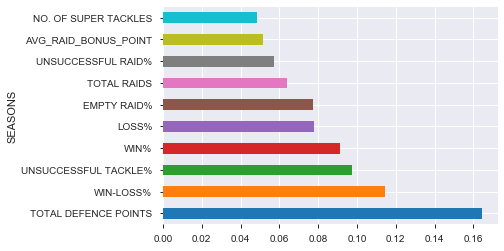

In [56]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [57]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'UNSUCCESSFUL RAID%', 'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT',
       'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS',
       'WIN-LOSS%'],
      dtype='object')


In [58]:
X_features = df4.filter(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'UNSUCCESSFUL RAID%', 'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT',
       'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS',
       'WIN-LOSS%'],axis=1)
X_features.shape

(7, 12)

In [59]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error_lqp0y9oo


AttributeError: module 'theano' has no attribute 'gof'

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [60]:
f_select =['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES',
       'TOTAL DEFENCE POINTS', 'WIN%', 'DRAW%', 'LOSS%', 'UNSUCCESSFUL RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS']
f_select

['SUCCESS RAID %',
 'SUCCESSFUL TACKLE %',
 'NO. OF SUPER TACKLES',
 'TOTAL DEFENCE POINTS',
 'WIN%',
 'DRAW%',
 'LOSS%',
 'UNSUCCESSFUL RAID%',
 'AVG_RAID_TOUCH_POINT',
 'AVG_RAID_BONUS_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [61]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[ 7.72788054e+02,  3.67811428e-01,  5.62855657e-02,
         4.59873754e-02,  3.15241313e-02, -1.52126198e-03,
         1.73124870e-14],
       [-6.26723667e+01, -2.00927931e+00, -1.62083229e+00,
        -5.03694823e-01, -2.06642484e-01,  3.17384548e-02,
         1.73124870e-14],
       [-1.10110186e+02, -3.89929340e+00,  2.58014100e+00,
        -2.54974124e-01, -8.51590588e-02, -2.37095561e-02,
         1.73124870e-14],
       [-1.44262824e+02,  6.77457362e+00, -3.96797862e-01,
        -8.36599072e-02, -1.37505098e-01, -3.01329640e-02,
         1.73124870e-14],
       [-1.67792733e+02,  1.90025971e+00,  4.54400618e-01,
        -2.93585675e-01,  3.77662400e-01,  1.95308734e-02,
         1.73124870e-14],
       [-1.42802804e+02,  7.45971316e-01,  9.60638036e-01,
         7.19932143e-01, -1.00931131e-01,  3.34610593e-02,
         1.73124870e-14],
       [-1.45147140e+02, -3.88004336e+00, -2.03383507e+00,
         3.69995010e-01,  1.21051240e-01, -2.93666056e-02,
         1.7312487

In [62]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [63]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,0.0,4991.0,0.42,0.38,95.0,1048.0,0.372881,0.067797,0.559322,0.227409,0.432378,13.737288,4.203390,0.654054,1.127119,0.666667
SEASON 7,1.0,644.0,0.51,0.41,7.0,148.0,0.812500,0.062500,0.125000,0.194099,0.377329,15.437500,5.125000,0.607143,1.625000,6.500000
SEASON 6,3.0,997.0,0.48,0.39,19.0,216.0,0.500000,0.083333,0.416667,0.224674,0.373119,15.291667,4.833333,0.645796,1.416667,1.200000
SEASON 5,6.0,973.0,0.35,0.34,12.0,169.0,0.227273,0.045455,0.727273,0.219938,0.489209,11.818182,3.818182,0.680080,0.818182,0.312500
SEASON 4,7.0,619.0,0.37,0.44,20.0,134.0,0.285714,0.071429,0.642857,0.193861,0.544426,12.142857,4.000000,0.620915,1.071429,0.444444
SEASON 3,8.0,614.0,0.38,0.32,13.0,111.0,0.071429,0.071429,0.857143,0.263844,0.457655,12.500000,4.142857,0.716763,0.642857,0.083333
SEASON 2,6.0,585.0,0.37,0.41,14.0,136.0,0.285714,0.071429,0.642857,0.258120,0.470085,12.428571,3.071429,0.633634,0.928571,0.444444
SEASON 1,6.0,559.0,0.51,0.36,10.0,134.0,0.357143,0.071429,0.571429,0.248658,0.311270,16.285714,4.071429,0.664865,1.285714,0.625000


In [64]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)

In [65]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
SEASON 7,644.0,0.51,0.41,7.0,148.0,0.8125,0.0625,0.125,0.194099,0.377329,15.4375,5.125,0.607143,1.625,6.5


In [66]:
y_test

SEASON 7    1.0
Name: FINISHING POSITION, dtype: float64

In [67]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [68]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[16:27:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.86092	validation_1-rmse:0.008333
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:4.46987	validation_1-rmse:0.474306
[2]	validation_0-rmse:4.112	validation_1-rmse:0.901447
[3]	validation_0-rmse:3.78463	validation_1-rmse:1.29299
[4]	validation_0-rmse:3.48576	validation_1-rmse:1.62973
[5]	validation_0-rmse:3.21089	validation_1-rmse:1.96058
[6]	validation_0-rmse:2.95981	validation_1-rmse:2.26387
[7]	validation_0-rmse:2.73062	validation_1-rmse:2.54188
[8]	validation_0-rmse:2.5217	validation_1-rmse:2.78113
[9]	validation_0-rmse:2.33032	validation_1-rmse:3.01604
[10]	validation_0-rmse:2.15609	validation_1-rmse:3.23137
[11]	validation_0-rmse:1.99767	validation_1-rmse:3.42875
[12

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [70]:
pred['MW_Prediction']

0    1.008333
Name: MW_Prediction, dtype: float32

In [71]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[1.0]

## Finding the win-loss% of a team for Season 7


In [73]:
df6.loc['SEASON 7','WIN-LOSS%']

6.5

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [74]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.42857142857142855

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [75]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.3402123822881186

## Finding the successful tackles % for season 7

In [77]:
SUCC_TACKLES =df2.loc['SEASON 7','SUCCESSFUL TACKLES']
TOT_TACKLES = df2.loc['SEASON 7','TOTAL TACKLES']

SUCC_TACKLES_PERC = SUCC_TACKLES/TOT_TACKLES
SUCC_TACKLES_PERC

0.39285714285714285

## Finding the Super-performance total of the team

In [76]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 15

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

25.0